# EDA

2014年のデータについて分析する。  
はじめは1月分から始める。


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../..')

from src.utils.io import load_month_data

In [3]:
# 1月のデータの全体像
df_1 = load_month_data(2014, 1)

Loading: [PosixPath('/app/data/raw/2014-citibike-tripdata/1_January/201401-citibike-tripdata_1.csv')]


# データの整理

| **カラム名** | **説明** |
| --- | --- |
| **tripduration** | ライドの継続時間（秒単位）。 |
| **starttime** | ライドが開始した日時。 |
| **stoptime** | ライドが終了した日時。 |
| **start station id** | ライド開始地点のステーションID。 |
| **start station name** | ライド開始地点のステーション名。 |
| **start station latitude** | ライド開始地点の緯度。 |
| **start station longitude** | ライド開始地点の経度。 |
| **end station id** | ライド終了地点のステーションID。 |
| **end station name** | ライド終了地点のステーション名。 |
| **end station latitude** | ライド終了地点の緯度。 |
| **end station longitude** | ライド終了地点の経度。 |
| **bikeid** | 使用された自転車のID。 |
| **usertype** | ユーザーのタイプ（例: **Subscriber** (定期会員) または **Customer** (短期利用者)）。 |
| **birth year** | ユーザーの誕生年。 |
| **gender** | ユーザーの性別（通常は **0** (不明/その他)、**1** (男性)、**2** (女性) でエンコードされています）。 |

In [4]:
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1
4,660,2014-01-01 00:05:18,2014-01-01 00:16:18,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300400 entries, 0 to 300399
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             300400 non-null  int64  
 1   starttime                300400 non-null  object 
 2   stoptime                 300400 non-null  object 
 3   start station id         300400 non-null  int64  
 4   start station name       300400 non-null  object 
 5   start station latitude   300400 non-null  float64
 6   start station longitude  300400 non-null  float64
 7   end station id           300400 non-null  int64  
 8   end station name         300400 non-null  object 
 9   end station latitude     300400 non-null  float64
 10  end station longitude    300400 non-null  float64
 11  bikeid                   300400 non-null  int64  
 12  usertype                 300400 non-null  object 
 13  birth year               300400 non-null  object 
 14  gend

In [6]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,300400.0,733.968945,5271.463917,60.000000,340.000000,513.000000,788.000000,1.990440e+06
start station id,300400.0,436.936598,323.895643,72.000000,306.000000,406.000000,490.000000,3.002000e+03
start station latitude,300400.0,40.734996,0.019408,40.680342,40.722055,40.737050,40.750224,4.077051e+01
start station longitude,300400.0,-73.990135,0.011779,-74.017134,-73.998102,-73.990093,-73.981854,-7.395005e+01
end station id,300400.0,437.742763,328.931404,72.000000,306.000000,405.000000,489.000000,3.002000e+03
end station latitude,300400.0,40.734814,0.019383,40.680342,40.721816,40.736529,40.750200,4.077051e+01
end station longitude,300400.0,-73.990328,0.011854,-74.017134,-73.998522,-73.990214,-73.981854,-7.395005e+01
bikeid,300400.0,17992.082044,2000.832564,14529.000000,16249.000000,17971.000000,19700.000000,2.153600e+04
gender,300400.0,1.165632,0.431966,0.000000,1.000000,1.000000,1.000000,2.000000e+00


# 基本統計の確認

## チェックリスト

- tripduration
  - 平均値、最大値がおかしくないか

- 緯度、軽度、場所IDは数値に意味はない

- bikeid
  - 使われる台数のスケール感チェック（unique台数）

- gender
  - 実質カテゴリ変数

## 結果

**tripduration**

- 平均は8分前後。
- 360分(99.9%)以上は考えなくてよさそう。
- 分布を見て、長時間の利用と短時間の利用で目的が違うはずなので分けて特徴量を確認する。
- 会員、非会員で大きく偏りがある。40:1

## tripduration

In [7]:
df_1["tripduration_min"] = df_1["tripduration"]/60

In [8]:
df_1["tripduration_min"].describe(percentiles=[0.5, 0.9, 0.99, 0.999])

count    300400.000000
mean         12.232816
std          87.857732
min           1.000000
50%           8.550000
90%          20.000000
99%          41.216667
99.9%       361.526767
max       33174.000000
Name: tripduration_min, dtype: float64

In [9]:
df_1["tripduration_min"]

0          7.850000
1         24.900000
2          7.733333
3          6.216667
4         11.000000
            ...    
300395    13.000000
300396    17.900000
300397     3.183333
300398    17.533333
300399    18.883333
Name: tripduration_min, Length: 300400, dtype: float64

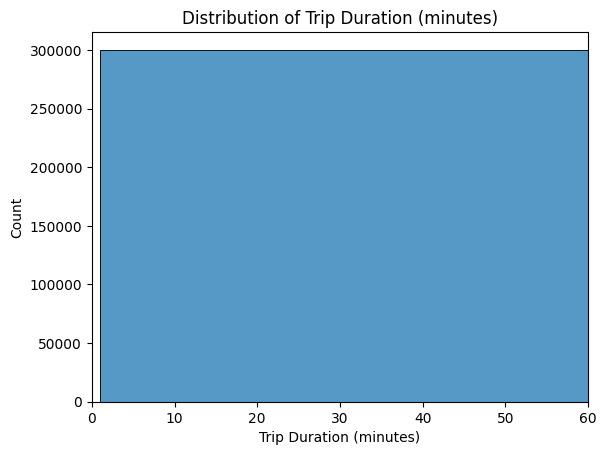

In [10]:
# 分布を確認
# これだと何もわからない

sns.histplot(data=df_1, x='tripduration_min', bins=50)
plt.xlabel("Trip Duration (minutes)")
plt.xlim(0, 60)  # 1時間以内を可視化
plt.title("Distribution of Trip Duration (minutes)")
plt.show()

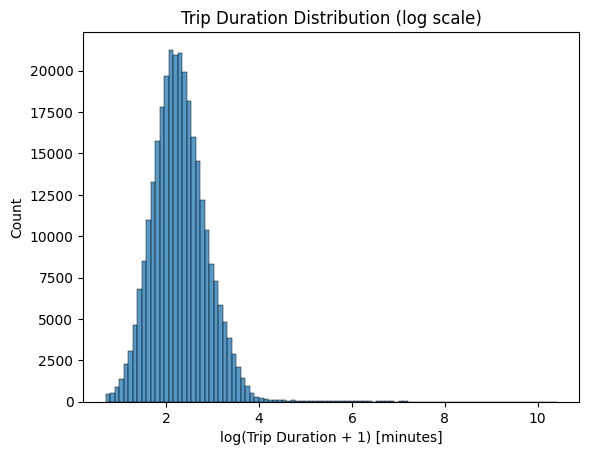

In [11]:
# 対数スケールを確認

sns.histplot(np.log1p(df_1["tripduration_min"]), bins=100)
plt.xlabel("log(Trip Duration + 1) [minutes]")
plt.title("Trip Duration Distribution (log scale)")
plt.show()

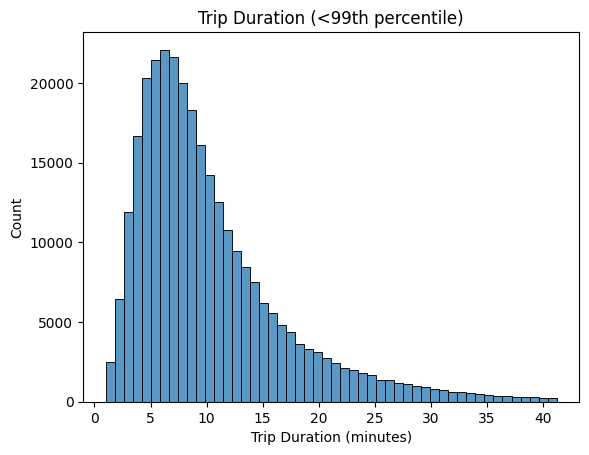

In [12]:
# 上位1%カット
threshold = df_1["tripduration_min"].quantile(0.99)
sns.histplot(x=df_1[df_1["tripduration_min"] < threshold]["tripduration_min"], bins=50)
plt.xlabel("Trip Duration (minutes)")
plt.title("Trip Duration (<99th percentile)")
plt.show()

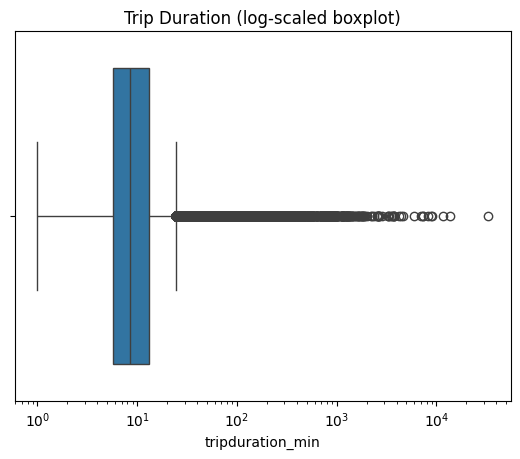

In [13]:
# 箱ひげ図

sns.boxplot(x=df_1["tripduration_min"])
plt.xscale("log")  
plt.title("Trip Duration (log-scaled boxplot)")
plt.show()

In [14]:
counts = {
    "1時間以上": (df_1["tripduration"] > 3600).sum(),
    "1日以上": (df_1["tripduration"] > 86400).sum()
}
for label, count in counts.items():
    print(f"{label}: {count} 件")


1時間以上: 1430 件
1日以上: 52 件


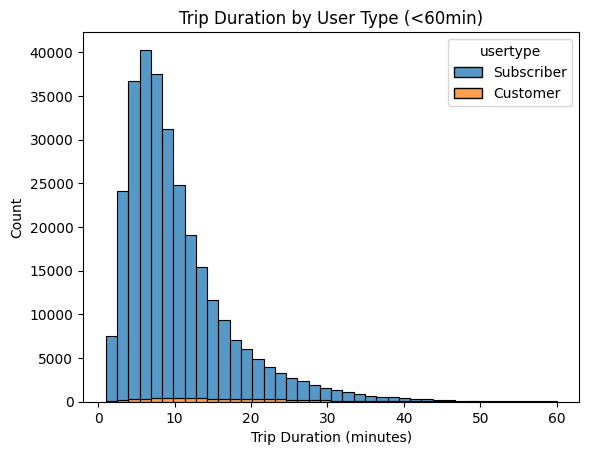

usertype
Subscriber    293146
Customer        7254
Name: count, dtype: int64

In [15]:
# 会員、非会員を分けた利用時間の分布を確認

sns.histplot(
    data=df_1[df_1["tripduration_min"] < 60],  # 短時間利用に限定
    x="tripduration_min",
    hue="usertype",
    bins=40,
    multiple="stack"
)
plt.title("Trip Duration by User Type (<60min)")
plt.xlabel("Trip Duration (minutes)")
plt.show()

df_1["usertype"].value_counts()

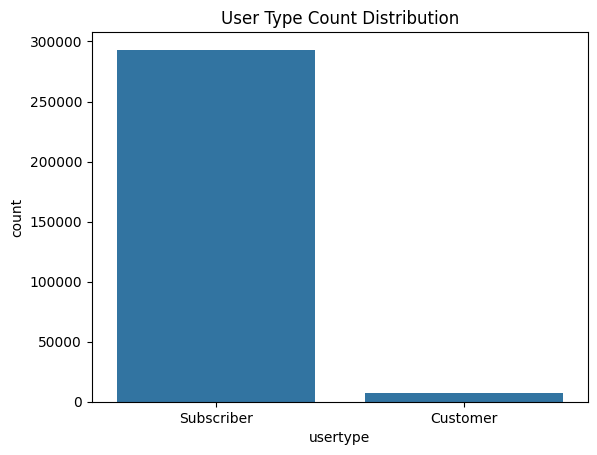

usertype
Subscriber    97.58522
Customer       2.41478
Name: proportion, dtype: float64

In [16]:
sns.countplot(data=df_1, x="usertype")
plt.title("User Type Count Distribution")
plt.show()

df_1["usertype"].value_counts(normalize=True) * 100

### 比率を補正して比較

会員側をランダムサンプリングしてEDAをしてみる。

#### 結果

ランダムサンプリングした後の利用時間の分布の特徴は

- 会員は短時間（~20分）が多い
- 非会員は（~30分）がボリュームゾーン、長時間利用も多い

In [17]:
n = df_1[df_1["usertype"] == "Customer"].shape[0]

df_balanced = pd.concat([
    df_1[df_1["usertype"] == "Subscriber"].sample(n, random_state=42),
    df_1[df_1["usertype"] == "Customer"]
])

print(df_balanced["usertype"].value_counts())

usertype
Subscriber    7254
Customer      7254
Name: count, dtype: int64


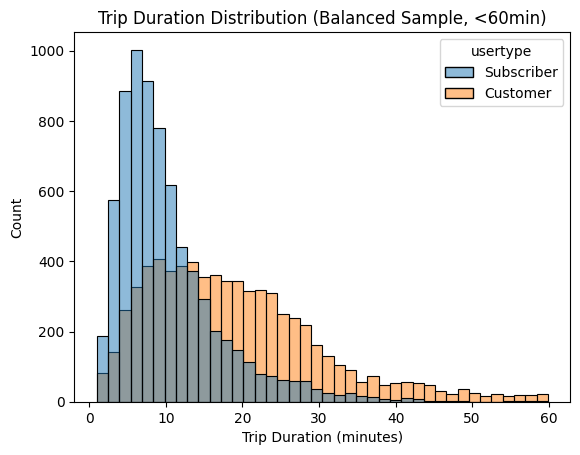

In [18]:
sns.histplot(
    data=df_balanced[df_balanced["tripduration_min"] < 60],
    x="tripduration_min",
    hue="usertype",
    bins=40,
    # multiple="stack"
)
plt.title("Trip Duration Distribution (Balanced Sample, <60min)")
plt.xlabel("Trip Duration (minutes)")
plt.show()

### 時間帯別の利用傾向を調べる

利用データは、

- 全体を時間帯別にカウント
- ユーザー別、時間別に利用回数の割合を算出

#### 結果

- 会員（Subscriber）
  - 朝7〜9時、夕方17〜19時にピーク（通勤パターン）
  - 平日は薄く、週末の昼（10〜16時）が濃い

- 非会員（Customer）
  - 昼10〜17時が多い（観光・レジャー）
  - 平日は薄く、週末の昼（10〜16時）が濃い

In [19]:
df_time = df_1.copy()

In [20]:
df_time["usertype"].value_counts()


usertype
Subscriber    293146
Customer        7254
Name: count, dtype: int64

In [21]:
# データを整形

# starttimeをdatetimeに変換
df_time["starttime"] = pd.to_datetime(df_time["starttime"])

# 出発時間の「時」だけ抽出（0〜23）
df_time["start_hour"] = df_time["starttime"].dt.hour

# 曜日名を追加（後で週末分析にも使える）
df_time["weekday"] = df_time["starttime"].dt.day_name()

# 必要な列だけ残す（軽量化＆明示化）
df_time = df_time[["usertype", "start_hour", "weekday"]]


In [22]:
df_time.head()

,usertype,start_hour,weekday
0,Subscriber,0,Wednesday
1,Subscriber,0,Wednesday
2,Subscriber,0,Wednesday
3,Subscriber,0,Wednesday
4,Subscriber,0,Wednesday


In [23]:
# 利用者別、時間帯別の利用回数割合を算出

df_hourly = (
    df_time
    .groupby(["usertype", "start_hour"])
    .count()
    .reset_index()
)

df_hourly["ratio"] = (
    df_hourly.groupby("usertype")["weekday"]
    .transform(lambda x: x / x.sum())
)

df_hourly

,usertype,start_hour,weekday,ratio
0,Customer,0,107,0.014750
1,Customer,1,73,0.010063
2,Customer,2,39,0.005376
3,Customer,3,33,0.004549
4,Customer,4,31,0.004274
5,Customer,5,23,0.003171
6,Customer,6,38,0.005238
7,Customer,7,74,0.010201
8,Customer,8,190,0.026192
9,Customer,9,256,0.035291


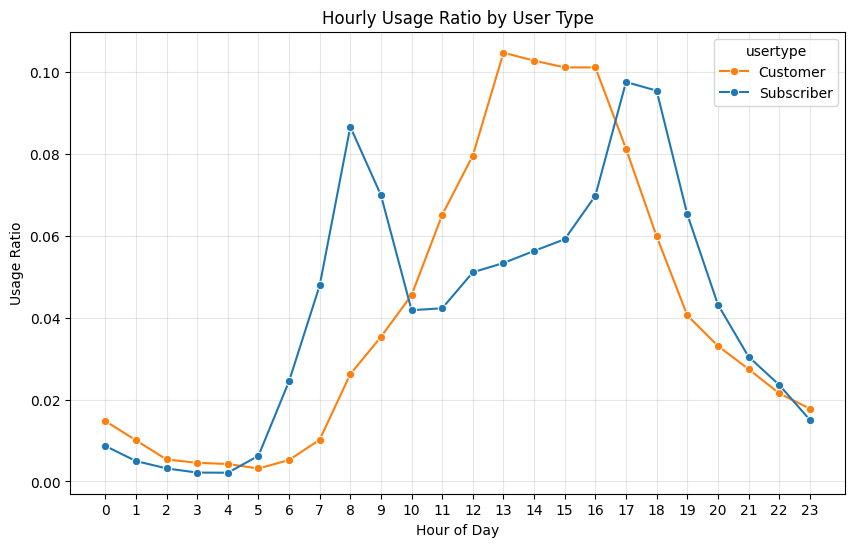

In [24]:
plt.figure(figsize=(10,6))
custom_palette = {
    "Subscriber": "tab:blue",  
    "Customer": "tab:orange"       
}
sns.lineplot(
    data=df_hourly,
    x="start_hour",
    y="ratio",
    hue="usertype",
    marker="o",
    palette=custom_palette
)
plt.title("Hourly Usage Ratio by User Type")
plt.xlabel("Hour of Day")
plt.ylabel("Usage Ratio")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

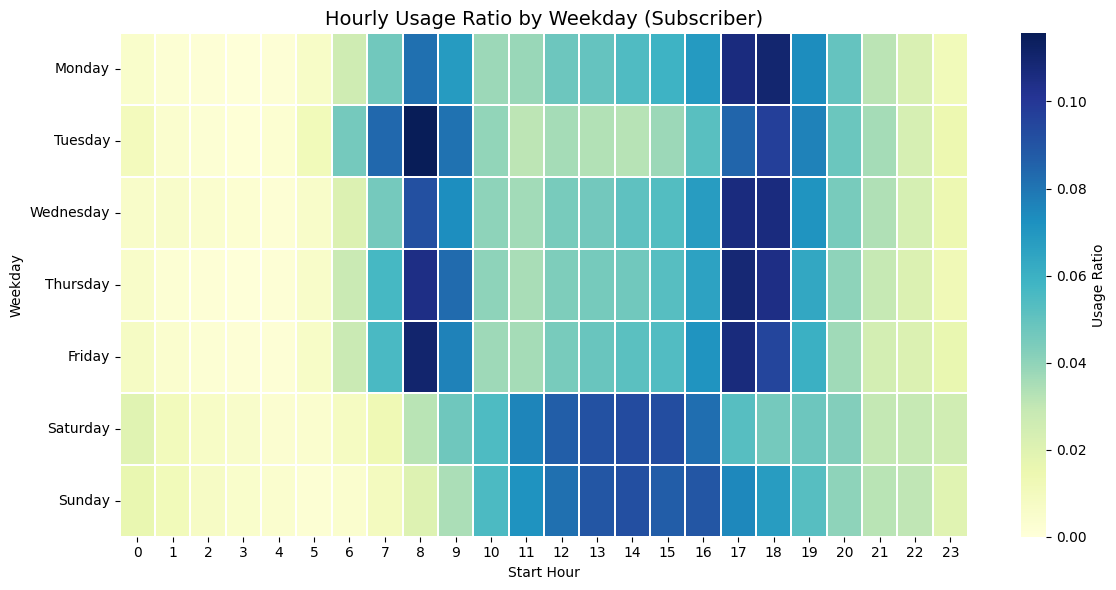

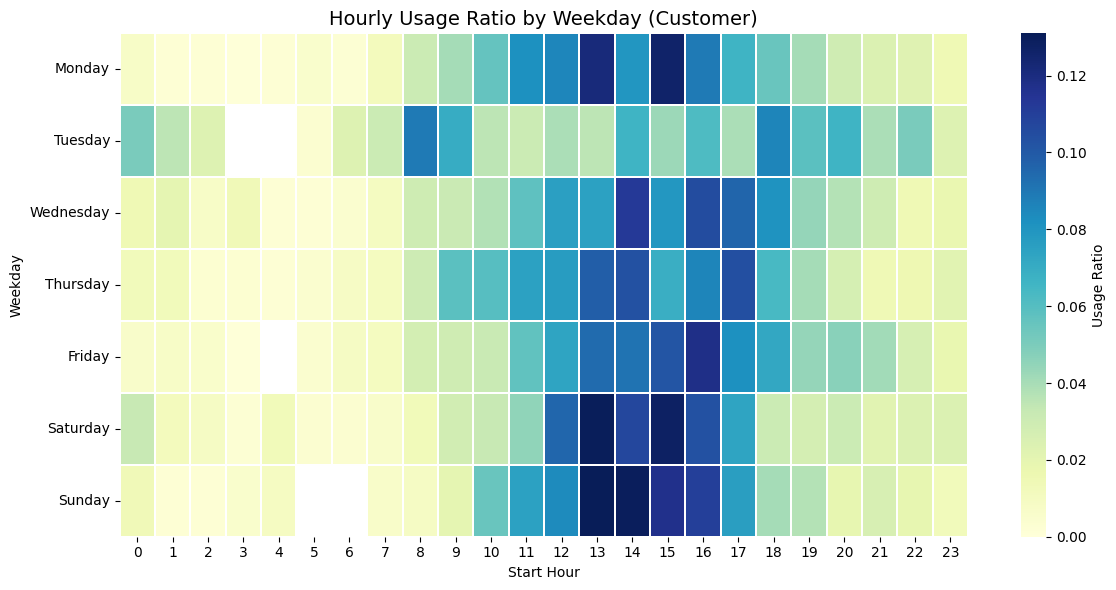

In [25]:
# 曜日順を固定
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# 会員・非会員ごとにヒートマップを作成
for user in df_time["usertype"].unique():
    sub = (
        df_time[df_time["usertype"] == user]
        .groupby(["weekday", "start_hour"])
        .size()
        .reset_index(name="count")
    )

    # 曜日×時間のピボット
    pivot = sub.pivot_table(
        index="weekday",
        columns="start_hour",
        values="count",
        aggfunc="sum"
    ).reindex(weekday_order)

    # 行方向で正規化（曜日ごとに比率化）
    pivot = pivot.div(pivot.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot,
        cmap="YlGnBu",
        linewidths=0.3,
        cbar_kws={"label": "Usage Ratio"},
        vmin=0, vmax=pivot.max().max()  # スケール固定
    )
    plt.title(f"Hourly Usage Ratio by Weekday ({user})", fontsize=14)
    plt.xlabel("Start Hour")
    plt.ylabel("Weekday")
    plt.tight_layout()
    plt.show()

## station

空間的特徴を把握したい。

- 出発ステーション・到着ステーションの頻出ランキング
- 会員／非会員での上位ステーションの違い
- 地図（folium / plotly）で地理的に可視化

### 結果

- 会員は郊外〜オフィス街っぽい
- 観光地エリアっぽい

In [26]:
# 出発ステーションごとの利用回数
top_stations = (
    df_1.groupby(["usertype", "start station name"])
    .count()
    .reset_index()
    # .rename(columns={"ride_id": "ride_count"})
    .sort_values(["usertype", "tripduration"], ascending=[True, False])
)

# 各ユーザー種別の上位10駅
top10 = top_stations.groupby("usertype").head(10)
top10

,usertype,start station name,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,tripduration_min
59,Customer,Central Park S & 6 Ave,189,189,189,189,189,189,189,189,189,189,189,189,189,189
156,Customer,Grand Army Plaza & Central Park S,134,134,134,134,134,134,134,134,134,134,134,134,134,134
60,Customer,Centre St & Chambers St,128,128,128,128,128,128,128,128,128,128,128,128,128,128
52,Customer,Broadway & W 58 St,125,125,125,125,125,125,125,125,125,125,125,125,125,125
214,Customer,Pershing Square N,84,84,84,84,84,84,84,84,84,84,84,84,84,84
299,Customer,West St & Chambers St,77,77,77,77,77,77,77,77,77,77,77,77,77,77
14,Customer,8 Ave & W 31 St,76,76,76,76,76,76,76,76,76,76,76,76,76,76
17,Customer,9 Ave & W 14 St,72,72,72,72,72,72,72,72,72,72,72,72,72,72
45,Customer,Broadway & W 36 St,68,68,68,68,68,68,68,68,68,68,68,68,68,68
247,Customer,W 14 St & The High Line,67,67,67,67,67,67,67,67,67,67,67,67,67,67


In [74]:
df_1["start station name"].value_counts()

start station name
Pershing Square N             3634
8 Ave & W 31 St               3295
Lafayette St & E 8 St         3178
W 21 St & 6 Ave               3068
E 17 St & Broadway            2764
                              ... 
Park Ave & St Edwards St        92
Carlton Ave & Park Ave          62
Hanover Pl & Livingston St      61
Bedford Ave & S 9th St          53
Railroad Ave & Kay Ave          26
Name: count, Length: 329, dtype: int64

In [77]:
# 地理的な情報を数値で表す

df_geo = df_1.copy()

start_station_popularity = df_geo.groupby("start station name").size().reset_index(name="start_station_usage_count")
end_station_popularity = df_geo.groupby("end station name").size().reset_index(name="end_station_usage_count")

df_geo = df_geo.merge(start_station_popularity, on="start station name", how="left")
df_geo = df_geo.merge(end_station_popularity, on="end station name", how="left")

df_geo

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min,start_station_usage_count,end_station_usage_count
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1,7.850000,460,1243
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1,24.900000,1195,407
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1,7.733333,955,569
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1,6.216667,3634,1115
4,660,2014-01-01 00:05:18,2014-01-01 00:16:18,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1,11.000000,444,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300395,780,2014-01-31 23:57:34,2014-02-01 00:10:34,308,St James Pl & Oliver St,40.713079,-73.998512,312,Allen St & E Houston St,40.722055,-73.989111,17299,Subscriber,1988,1,13.000000,587,1202
300396,1074,2014-01-31 23:57:45,2014-02-01 00:15:39,482,W 15 St & 7 Ave,40.739355,-73.999318,488,W 39 St & 9 Ave,40.756458,-73.993722,19886,Subscriber,1982,1,17.900000,1326,1914
300397,191,2014-01-31 23:58:16,2014-02-01 00:01:27,247,Perry St & Bleecker St,40.735354,-74.004831,368,Carmine St & 6 Ave,40.730386,-74.002150,20249,Subscriber,1969,2,3.183333,765,1700
300398,1052,2014-01-31 23:58:34,2014-02-01 00:16:06,482,W 15 St & 7 Ave,40.739355,-73.999318,488,W 39 St & 9 Ave,40.756458,-73.993722,19922,Subscriber,1981,2,17.533333,1326,1914


## gender, birth year

属性分析をする。

- 会員・非会員の年齢・性別の特徴を把握
- ターゲット層（＝将来の会員化候補）を明確にする
- モデル化（会員予測）に使える有効な特徴量を見つける

※ Customerはbirth yearが登録されていない

In [62]:
df_1["birth year"]

0         1986
1         1963
2         1991
3         1989
4         1990
          ... 
300395    1988
300396    1982
300397    1969
300398    1981
300399    1969
Name: birth year, Length: 300400, dtype: object

In [54]:
df_char = df_1.copy()

df_char = df_char[df_char["birth year"].str.isnumeric()]

df_char["birth year"] = df_char["birth year"].astype(int)
df_char["age"] = 2014 - df_char["birth year"]

df_char = df_char[(df_char["age"] >= 15) & (df_char["age"] <= 70)]

# 年齢の分布を確認
df_char["age"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    291826.000000
mean         39.014512
std          10.987782
min          17.000000
5%           24.000000
25%          30.000000
50%          37.000000
75%          47.000000
95%          59.000000
max          70.000000
Name: age, dtype: float64

In [55]:
df_char["usertype"].value_counts()

usertype
Subscriber    291826
Name: count, dtype: int64

In [56]:
gender_map = {0: "Unknown", 1: "Male", 2: "Female"}
df_char["gender_label"] = df_char["gender"].map(gender_map)

df_char["gender_label"].value_counts()

gender_label
Male       234941
Female      56870
Unknown        15
Name: count, dtype: int64

In [57]:
df_1[df_1["usertype"] == "Customer"]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min
10,718,2014-01-01 00:09:32,2014-01-01 00:21:30,263,Elizabeth St & Hester St,40.717290,-73.996375,251,Mott St & Prince St,40.723180,-73.994800,15693,Customer,\N,0,11.966667
15,1367,2014-01-01 00:12:47,2014-01-01 00:35:34,519,Pershing Square N,40.751884,-73.977702,386,Centre St & Worth St,40.714948,-74.002345,20731,Customer,\N,0,22.783333
26,1191,2014-01-01 00:21:51,2014-01-01 00:41:42,251,Mott St & Prince St,40.723180,-73.994800,404,9 Ave & W 14 St,40.740583,-74.005509,15693,Customer,\N,0,19.850000
38,1957,2014-01-01 00:27:00,2014-01-01 00:59:37,2006,Central Park S & 6 Ave,40.765909,-73.976342,497,E 17 St & Broadway,40.737050,-73.990093,20352,Customer,\N,0,32.616667
39,851,2014-01-01 00:27:24,2014-01-01 00:41:35,251,Mott St & Prince St,40.723180,-73.994800,404,9 Ave & W 14 St,40.740583,-74.005509,16253,Customer,\N,0,14.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300258,1362,2014-01-31 23:24:51,2014-01-31 23:47:33,432,E 7 St & Avenue A,40.726218,-73.983799,432,E 7 St & Avenue A,40.726218,-73.983799,19163,Customer,\N,0,22.700000
300307,798,2014-01-31 23:38:39,2014-01-31 23:51:57,482,W 15 St & 7 Ave,40.739355,-73.999318,490,8 Ave & W 33 St,40.751551,-73.993934,20768,Customer,\N,0,13.300000
300323,1605,2014-01-31 23:40:57,2014-02-01 00:07:42,529,W 42 St & 8 Ave,40.757570,-73.990985,237,E 11 St & 2 Ave,40.730473,-73.986724,17540,Customer,\N,0,26.750000
300351,453,2014-01-31 23:47:35,2014-01-31 23:55:08,168,W 18 St & 6 Ave,40.739713,-73.994564,474,5 Ave & E 29 St,40.745168,-73.986831,20157,Customer,\N,0,7.550000


In [58]:
df_char[df_char["usertype"] == "Customer"]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_min,age,gender_label


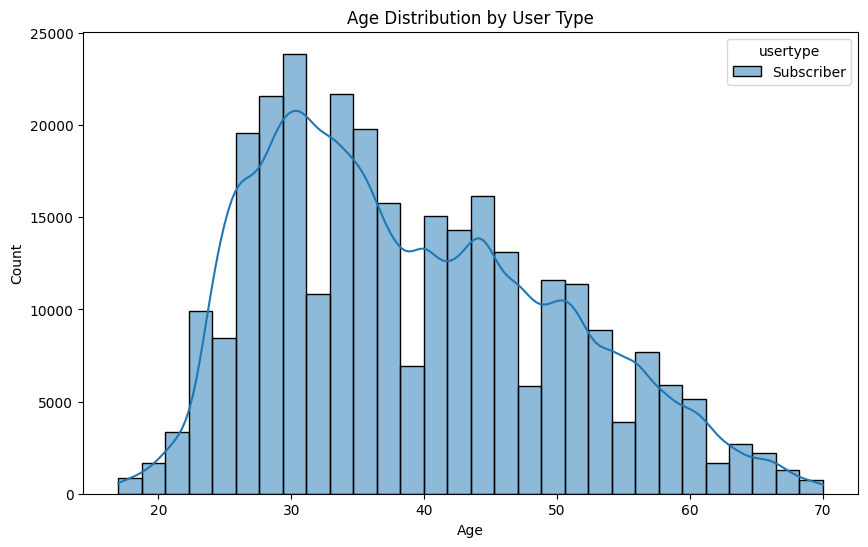

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_char,
    x="age",
    hue="usertype",
    bins=30,
    kde=True,
    multiple="stack"
)
plt.title("Age Distribution by User Type")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

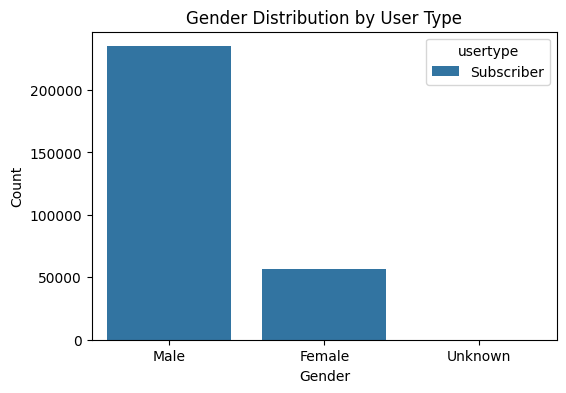

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_char,
    x="gender_label",
    hue="usertype"
)
plt.title("Gender Distribution by User Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [61]:
age_gender_pivot = (
    df_char.groupby(["usertype", "gender_label"])["age"]
    .agg(["mean", "median", "count"])
    .reset_index()
)
age_gender_pivot

,usertype,gender_label,mean,median,count
0,Subscriber,Female,38.078706,35.0,56870
1,Subscriber,Male,39.240277,37.0,234941
2,Subscriber,Unknown,50.866667,63.0,15


## bike_id

- どの自転車がどのくらい使われているか？（稼働率）
- 1台の自転車がどのくらいの期間稼働しているか？
- ある自転車は特定エリアに偏って使われていないか？
- 通勤用（短距離多回転）か観光用（長距離低回転）か？


In [68]:
bike_stats = (
    df_1.groupby("bikeid")
    .agg(
        ride_count=("tripduration", "count"),
        total_duration=("tripduration_min", "sum"),
        avg_duration=("tripduration_min", "mean"),
        usertype_mode=("usertype", lambda x: x.value_counts().idxmax())
    )
    .reset_index()
)

bike_stats.sort_values("ride_count", ascending=False).head(10)

,bikeid,ride_count,total_duration,avg_duration,usertype_mode
5963,21076,126,1395.550000,11.075794,Subscriber
1630,16326,117,1417.216667,12.112963,Subscriber
113,14673,112,3910.650000,34.916518,Subscriber
5121,20045,112,1105.683333,9.872173,Subscriber
3602,18434,111,1469.633333,13.239940,Subscriber
5289,20223,110,1061.100000,9.646364,Subscriber
1189,15848,109,1178.883333,10.815443,Subscriber
5868,20978,109,1098.316667,10.076300,Subscriber
5440,20507,106,1154.400000,10.890566,Subscriber
5180,20113,105,1039.866667,9.903492,Subscriber
